In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

In [3]:
df = pd.read_csv(r"D:\Data Science\csv file code\ds_salaries.csv")


In [4]:
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Data Preprocessing Part 1

In [5]:
#drop salary column because there's salary in usd column
#drop salary_currency column to make it universal by using only usd
df.drop(columns=['salary', 'salary_currency'], inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [6]:
#Check the missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [7]:
#Check the number of unique value on object datatype
df.select_dtypes(include='object').nunique()

experience_level       4
employment_type        4
job_title             93
employee_residence    78
company_location      72
company_size           3
dtype: int64

Categorize the Job Title

In [8]:
df.job_title.unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [9]:
def segment_job_title(job_title):
    data_scientist_titles = ['Principal Data Scientist', 'Data Scientist', 'Applied Scientist', 'Research Scientist', 'Applied Data Scientist', 'Lead Data Scientist', 'Staff Data Scientist', 'Principal Data Analyst', 'Principal Data Engineer']
    machine_learning_titles = ['ML Engineer', 'Machine Learning Engineer', 'Applied Machine Learning Engineer', 'Machine Learning Researcher', 'Machine Learning Scientist', 'Autonomous Vehicle Technician', 'Applied Machine Learning Scientist', 'Principal Machine Learning Engineer', 'Machine Learning Developer', 'Lead Machine Learning Engineer', 'Machine Learning Manager']
    data_analyst_titles = ['Data Analyst', 'Data Quality Analyst', 'Compliance Data Analyst', 'Business Data Analyst', 'Staff Data Analyst', 'Lead Data Analyst', 'BI Data Analyst', 'Marketing Data Analyst', 'Finance Data Analyst']
    data_engineer_titles = ['Data Modeler', 'Data Engineer', 'ETL Engineer', 'Data DevOps Engineer', 'Big Data Engineer', 'Data Infrastructure Engineer', 'Software Data Engineer', 'Cloud Database Engineer', 'Cloud Data Engineer', 'Cloud Data Architect', 'Lead Data Engineer', 'Principal Data Engineer']
    bi_analytics_titles = ['Data Analytics Manager', 'Business Intelligence Engineer', 'Analytics Engineer', 'BI Data Engineer', 'Director of Data Science', 'BI Developer', 'Insight Analyst', 'Data Analytics Specialist', 'Data Analytics Lead', 'Power BI Developer', 'Cloud Data Architect']
    other_titles = ['Data Strategist', 'Computer Vision Engineer', 'AI Developer', 'Head of Data']

    if job_title in data_scientist_titles:
        return 'Data Scientist'
    elif job_title in machine_learning_titles:
        return 'Machine Learning Engineer'
    elif job_title in data_analyst_titles:
        return 'Data Analyst'
    elif job_title in data_engineer_titles:
        return 'Data Engineer'
    elif job_title in bi_analytics_titles:
        return 'Business Intelligence and Analytics'
    elif job_title in other_titles:
        return 'Other'
    else:
        return 'Uncategorized'

In [10]:
df['job_title'] = df['job_title'].apply(segment_job_title)

<Axes: xlabel='job_title'>

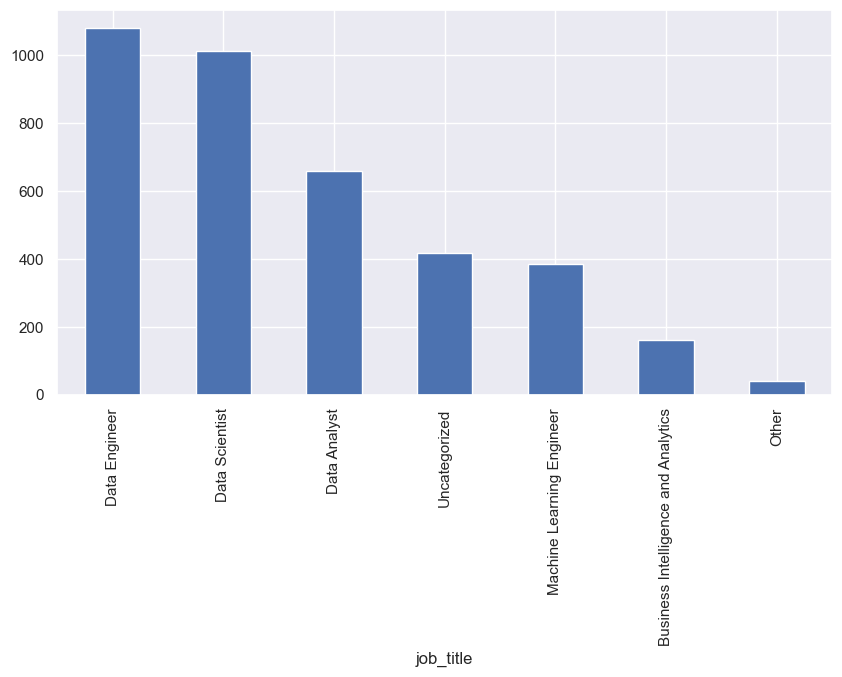

In [11]:
plt.figure(figsize=(10,5))
df['job_title'].value_counts().plot(kind='bar')

Categorize the Employee Residence

In [12]:
df.employee_residence.unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG',
       'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY',
       'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL',
       'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE',
       'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU',
       'MT'], dtype=object)

In [13]:
# Define a function to categorize the unique values
def categorize_region(country):
    if country in ['DE', 'GB', 'PT', 'NL', 'CH', 'CF', 'FR', 'FI', 'UA', 'IE', 'AT', 'SG', 'SE', 'SI', 'UZ', 'HR', 'PL', 'CY', 'AM', 'BA', 'GR', 'MK', 'LV', 'RO', 'IT', 'MA', 'LT', 'BE', 'AS', 'HU', 'SK', 'CZ', 'JE', 'RS', 'MD', 'LU', 'MT']:
        return 'Europe'
    elif country in ['US', 'CA', 'MX']:
        return 'North America'
    elif country in ['BR', 'AR', 'CL', 'BO', 'CR', 'DO', 'PR', 'HN', 'UY']:
        return 'South America'
    elif country in ['NG', 'GH', 'KE', 'TN', 'DZ']:
        return 'Africa'
    elif country in ['HK', 'IN', 'CN', 'JP', 'KR', 'BD', 'VN', 'PH', 'MY', 'ID', 'AE']:
        return 'Asia'
    elif country in ['AU', 'NZ']:
        return 'Oceania'
    else:
        return 'Unknown'

# Apply the function to the "employee residence" column to create a new column with the categorized values
df['employee_residence'] = df['employee_residence'].apply(categorize_region)


<Axes: xlabel='employee_residence'>

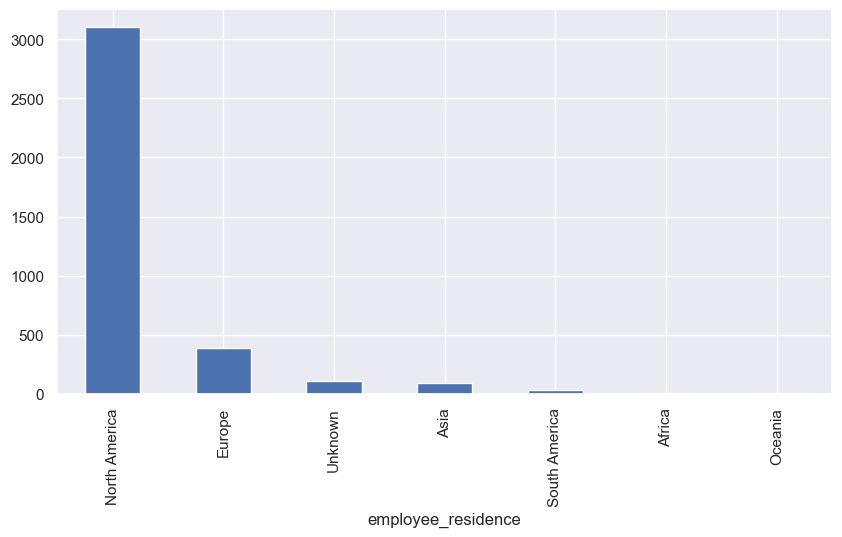

In [14]:
plt.figure(figsize=(10,5))
df['employee_residence'].value_counts().plot(kind='bar')

Categorize the Company Location

In [15]:
df.company_location.unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [16]:
# Define a function to categorize the unique values
def categorize_region(country):
    if country in ['DE', 'GB', 'PT', 'NL', 'CH', 'CF', 'FR', 'FI', 'UA', 'IE', 'AT', 'SG', 'SE', 'SI', 'UZ', 'HR', 'PL', 'CY', 'AM', 'BA', 'GR', 'MK', 'LV', 'RO', 'IT', 'MA', 'LT', 'BE', 'AS', 'HU', 'SK', 'CZ', 'JE', 'RS', 'MD', 'LU', 'MT']:
        return 'Europe'
    elif country in ['US', 'CA', 'MX']:
        return 'North America'
    elif country in ['BR', 'AR', 'CL', 'BO', 'CR', 'DO', 'PR', 'HN', 'UY']:
        return 'South America'
    elif country in ['NG', 'GH', 'KE', 'TN', 'DZ']:
        return 'Africa'
    elif country in ['HK', 'IN', 'CN', 'JP', 'KR', 'BD', 'VN', 'PH', 'MY', 'ID', 'AE']:
        return 'Asia'
    elif country in ['AU', 'NZ']:
        return 'Oceania'
    else:
        return 'Unknown'

# Apply the function to the "company_location" column to create a new column with the categorized values
df['company_location'] = df['company_location'].apply(categorize_region)


<Axes: xlabel='company_location'>

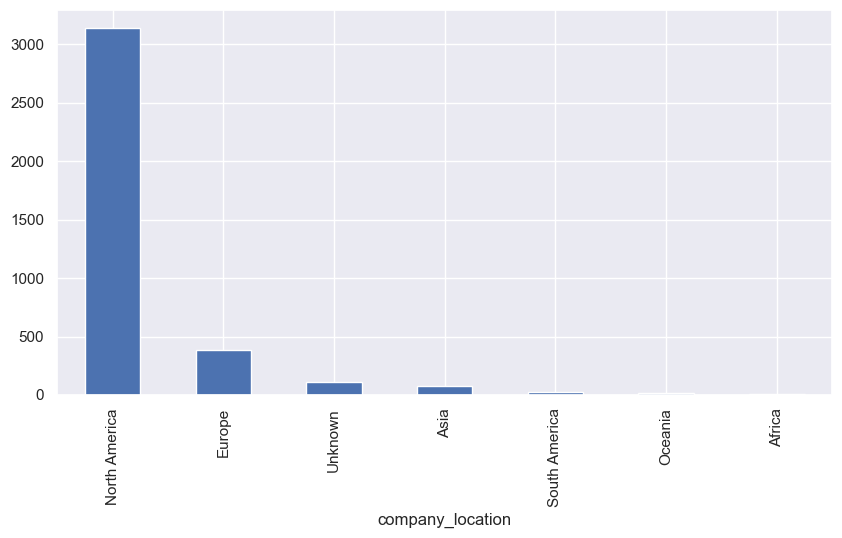

In [17]:
plt.figure(figsize=(10,5))
df['company_location'].value_counts().plot(kind='bar')

In [18]:
#Check the number of unique value on object datatype
df.select_dtypes(include='object').nunique()

experience_level      4
employment_type       4
job_title             7
employee_residence    7
company_location      7
company_size          3
dtype: int64

Exploratory Data Analysis

In [19]:
df.remote_ratio.unique()

array([100,   0,  50], dtype=int64)

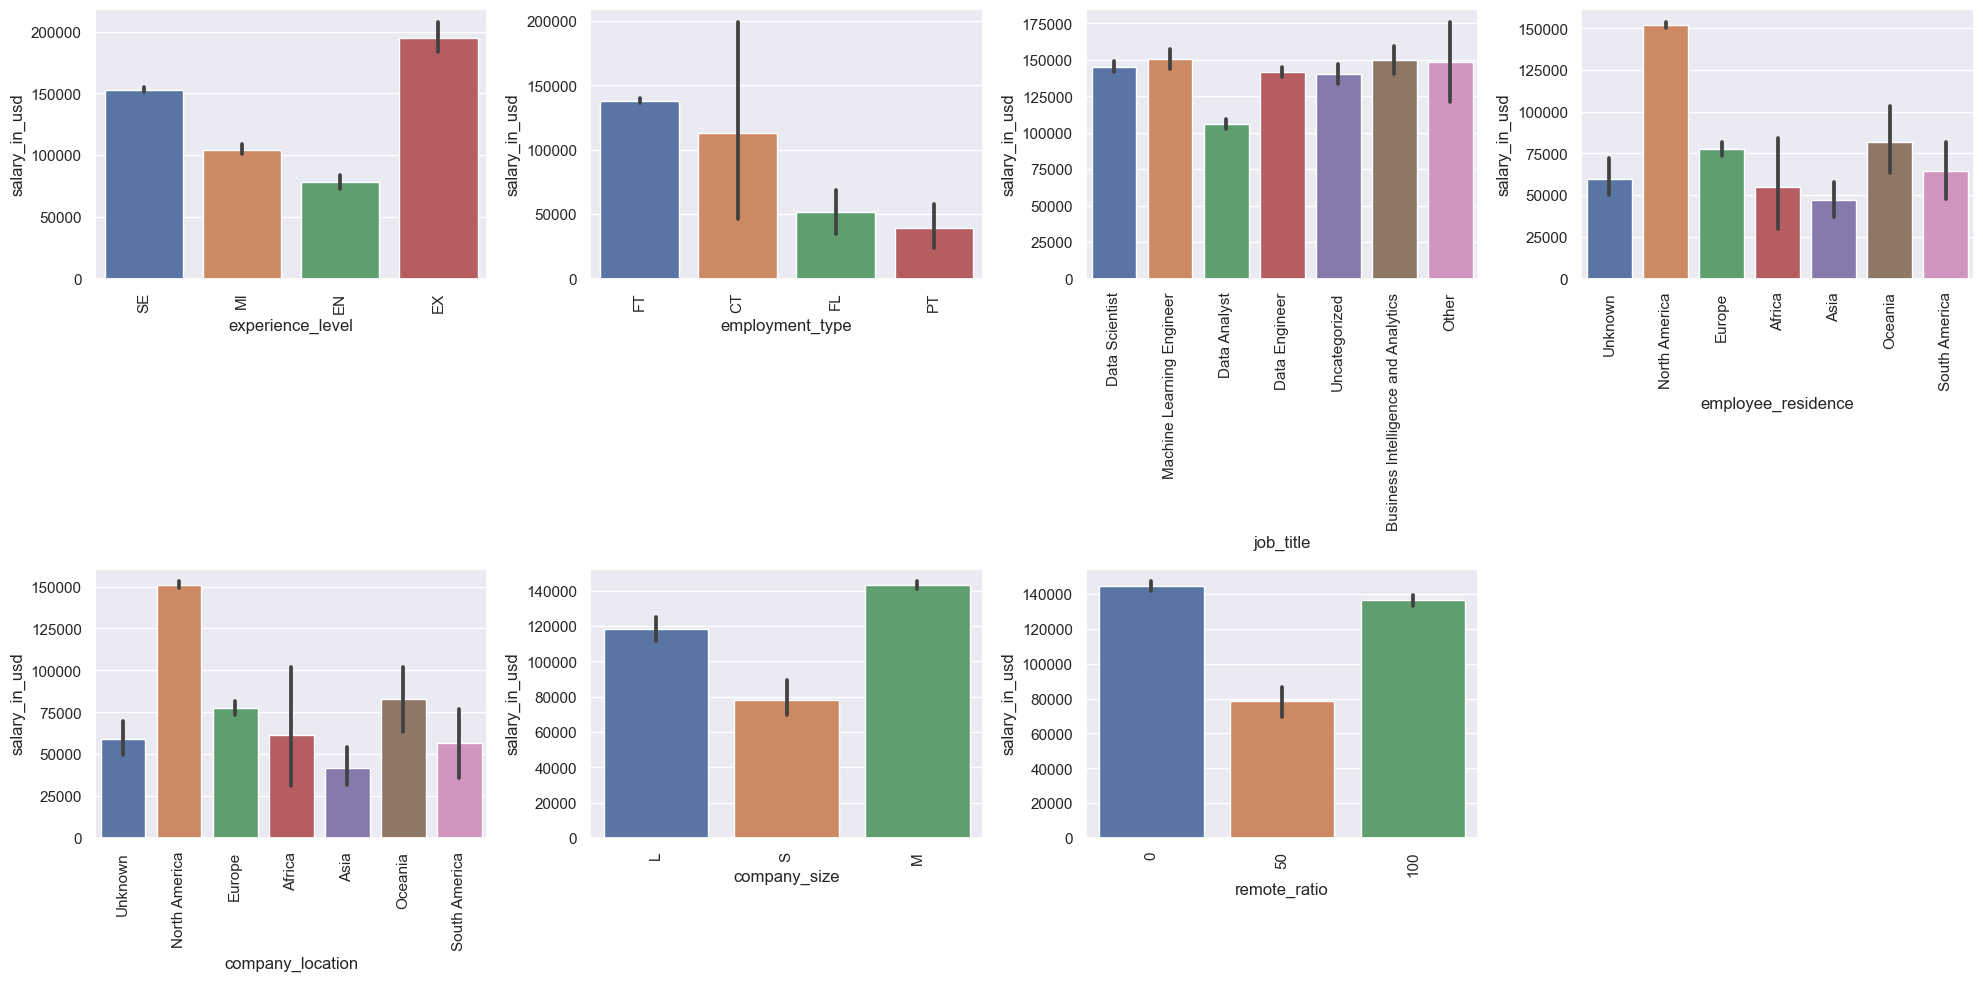

In [20]:
# list of categorical variables to plot
cat_vars = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 
            'company_location', 'company_size', 'remote_ratio']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='salary_in_usd', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# remove the eighth subplot
fig.delaxes(axs[7])

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_5024\2722140053.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='work_year', y='salary_in_usd', hue='job_title', data=df, ci=None, estimator='mean', alpha=0.7)


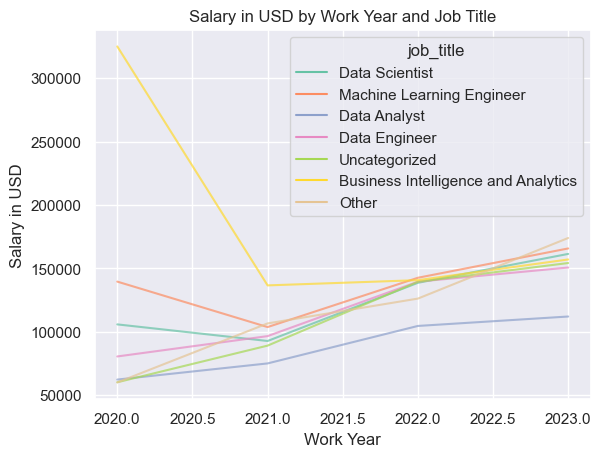

In [21]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='work_year', y='salary_in_usd', hue='job_title', data=df, ci=None, estimator='mean', alpha=0.7)

plt.title("Salary in USD by Work Year and Job Title")
plt.xlabel("Work Year")
plt.ylabel("Salary in USD")

plt.show()

Data Preprocessing Part 2

Label Encoding for Object datatype

In [22]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

experience_level: ['SE' 'MI' 'EN' 'EX']
employment_type: ['FT' 'CT' 'FL' 'PT']
job_title: ['Data Scientist' 'Machine Learning Engineer' 'Data Analyst'
 'Data Engineer' 'Uncategorized' 'Business Intelligence and Analytics'
 'Other']
employee_residence: ['Unknown' 'North America' 'Europe' 'Africa' 'Asia' 'Oceania'
 'South America']
company_location: ['Unknown' 'North America' 'Europe' 'Africa' 'Asia' 'Oceania'
 'South America']
company_size: ['L' 'S' 'M']


In [23]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

experience_level: [3 2 0 1]
employment_type: [2 0 1 3]
job_title: [3 4 1 2 6 0 5]
employee_residence: [6 3 2 0 1 4 5]
company_location: [6 3 2 0 1 4 5]
company_size: [0 2 1]


In [24]:
df.dtypes

work_year             int64
experience_level      int32
employment_type       int32
job_title             int32
salary_in_usd         int64
employee_residence    int32
remote_ratio          int64
company_location      int32
company_size          int32
dtype: object

All of the data are categorial so that means, there are no outliers

<Axes: >

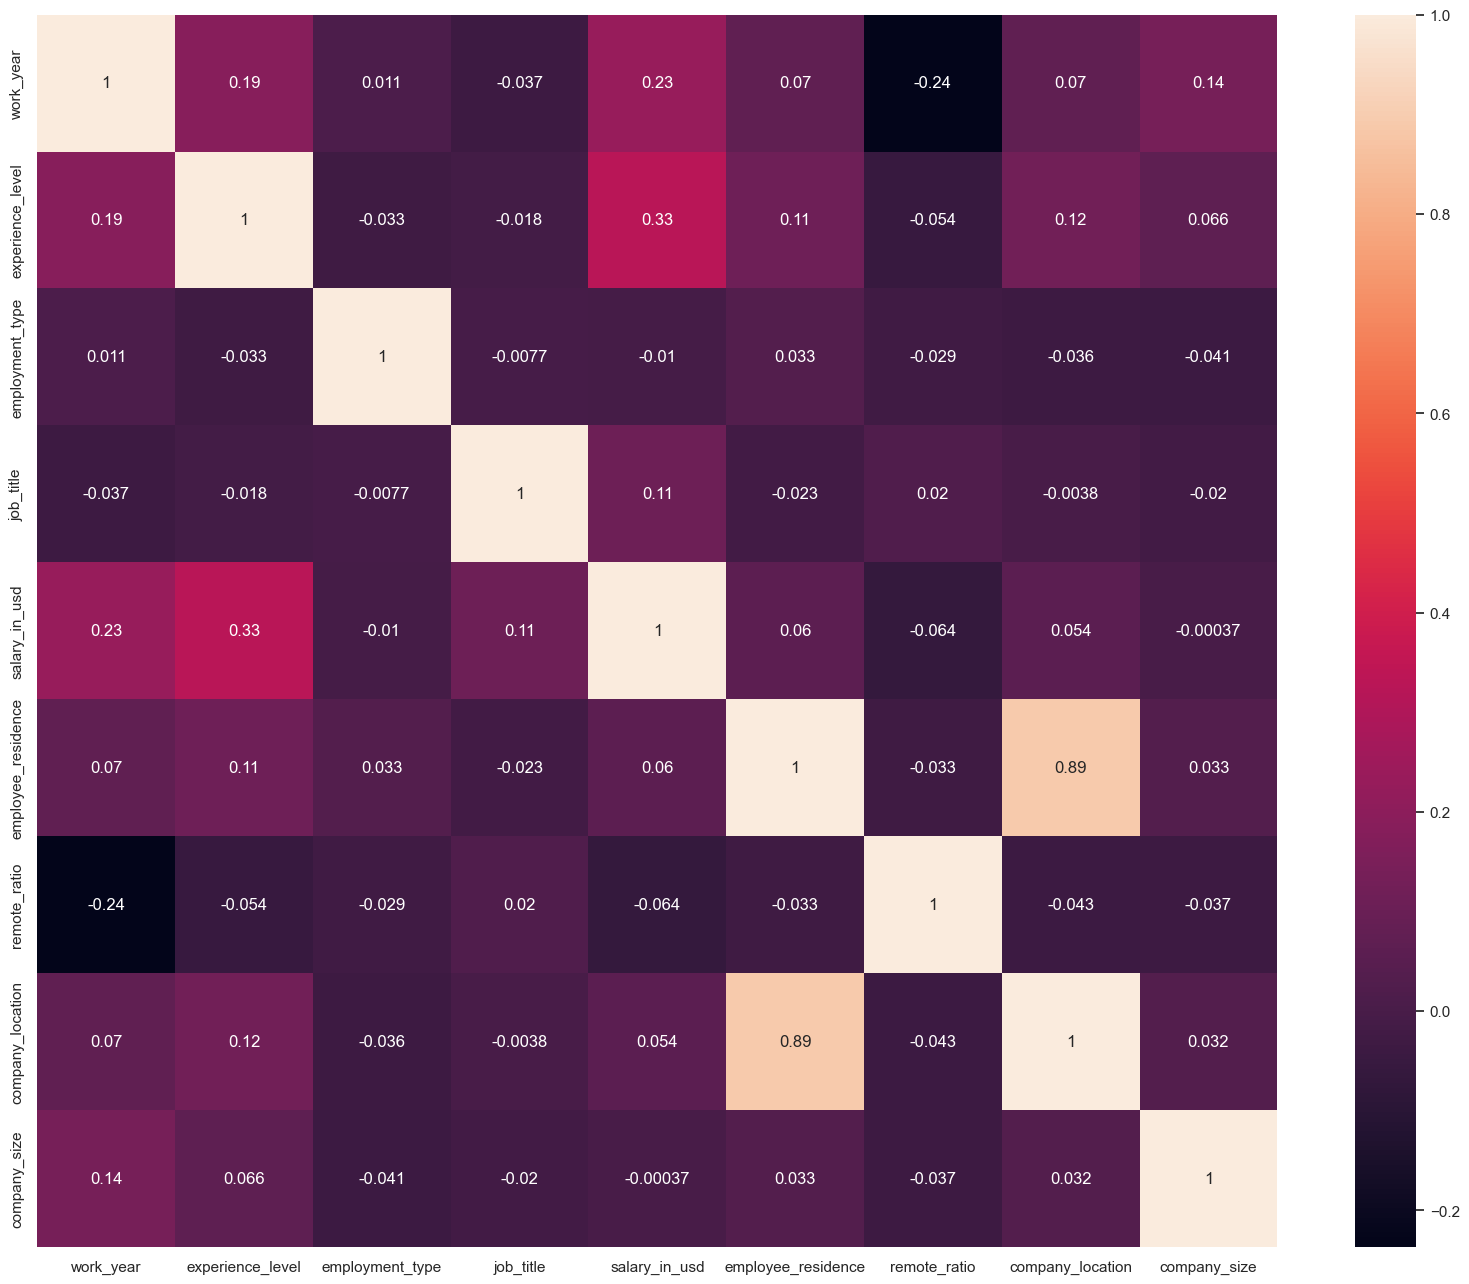

In [25]:
#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)